ValueError: 'c' argument has 20 elements, which is inconsistent with 'x' and 'y' with size 10.

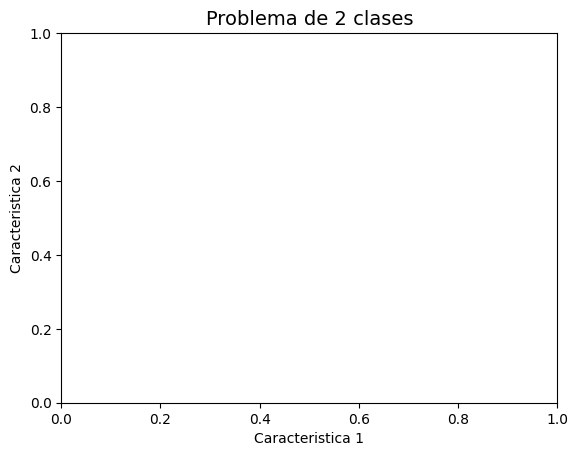

In [5]:
import matplotlib.pyplot as plt
from function.generate_data import datos_xor
from sklearn import cluster, datasets
n_samples = 1500
X, y = datos_xor(10, 2)
plt.title('Problema de 2 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,0], X[:,1], c=y);



In [7]:
import numpy as np
from models.NLP import NLP
from sklearn.metrics import accuracy_score
from function.act_functions import sigmoid_function
from sklearn.model_selection import train_test_split

from function.loss_function import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_input = X.shape[1]
n_layers = 2
n_neurons_layer = [5, 2]
activation_function = sigmoid_function
learning_rate = 0.1

nlp = NLP(n_layers=n_layers, n_neurons_layer=n_neurons_layer, activation_function=activation_function,
              input_features=n_input, learning_rate=learning_rate)

predictions = nlp.forward_propagation(X_train)

for i in range(len(X_train)):
    print(f"Predicción: {predictions[i]}")
    print(f"Etiqueta real: {y_train[i]}")
errors = []
epochs = 1000
for epoch in range(epochs):
    predictions = nlp.forward_propagation(X_train)
    error = mean_squared_error(predictions, y_train)
    errors.append(error)
print(f'Errores: {errors}')

nlp.train(X_train, y_train, epochs=100)
predictions = nlp.forward_propagation(X_test)
predictions_binary = np.where(predictions > 0.5, 1, 0)

mse = mean_squared_error(predictions, y_test)
accuracy = accuracy_score(y_test, predictions_binary)

print(f'MSE: {mse}')
print("Precisión:", accuracy)

Predicción: [0.70358898 0.21787868]
Etiqueta real: [1 0]
Predicción: [0.65800851 0.30383578]
Etiqueta real: [0 1]
Predicción: [0.70640639 0.19832794]
Etiqueta real: [1 0]
Predicción: [0.64612156 0.25348292]
Etiqueta real: [0 1]
Predicción: [0.66859776 0.26583255]
Etiqueta real: [0 1]
Predicción: [0.58470765 0.30210866]
Etiqueta real: [1 0]
Predicción: [0.65939594 0.26915603]
Etiqueta real: [0 1]
Predicción: [0.60958387 0.28990386]
Etiqueta real: [1 0]
Errores: [0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.2880255954097346, 0.288025595409